Problem 2. Divide the diabetes data into train and test datasets and build a Random Forest and Decision Tree model with Outcome as the output variable. 
___________________________________________________________________________________________________________________________________________________________

Business Objective

Maximize:

The model's ability to accurately classify individuals as diabetic or non-diabetic (Outcome = 1 or 0).
Recall (Sensitivity): Ensure minimal false negatives (diabetic individuals incorrectly classified as non-diabetic).

Minimize:

False Negatives: Critical in a healthcare setting where missed diagnoses can lead to adverse health outcomes.
Overfitting: Avoid models that perform well on training data but fail to generalize.


Constraints:

Medical Relevance:The model must provide insights that are interpretable and actionable for healthcare providers.
Class Imbalance:The dataset may have more non-diabetic than diabetic individuals (imbalance in Outcome). Address this by oversampling (SMOTE), undersampling, or adjusting class weights.
Data Preprocessing:Handle missing or zero values in critical features like Glucose, Insulin, and BloodPressure, as these may not represent valid measurements.
________________________________________________________________________________________________________________________________________________________

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [4]:
df=pd.read_csv("Diabetes.csv")
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [5]:
df.columns


Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', ' Class variable'],
      dtype='object')

In [6]:
#Data dictionary
#Number of times pregnant - Dicreate data
#Plasma Glucose Concentration - Discreate data
#Diastolic blood pressure - Discreate data
#Triceps skin fold thickness - Discreate data
#2-Hour serum insulin - Discreat data
#2-Hour serum insulin - Discreate data
#Body mass index - Continous data
#Diabetes pedigree function - Continous data
#Age(years) - Discreate data
#class variables - Categorical data


In [8]:
df[" Class variable"]=np.where(df[" Class variable"]=="YES",1,df[" Class variable"])
df[" Class variable"]=np.where(df[" Class variable"]=="NO",0,df[" Class variable"])
##Here we have changed feature Class variable which was having values in Yes and no fromat are now canged to 1 as Yes and 0 as no

In [13]:
df[" Class variable"].unique

<bound method Series.unique of 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name:  Class variable, Length: 768, dtype: object>

In [15]:
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
df.dtypes

Number of times pregnant          int64
Plasma glucose concentration      int64
Diastolic blood pressure          int64
Triceps skin fold thickness       int64
2-Hour serum insulin              int64
Body mass index                 float64
Diabetes pedigree function      float64
Age (years)                       int64
Class variable                   object
dtype: object

In [19]:
df[" Class variable"] = df[" Class variable"].astype('int64') 

In [21]:
df.shape

(768, 9)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Number of times pregnant      768 non-null    int64  
 1    Plasma glucose concentration  768 non-null    int64  
 2    Diastolic blood pressure      768 non-null    int64  
 3    Triceps skin fold thickness   768 non-null    int64  
 4    2-Hour serum insulin          768 non-null    int64  
 5    Body mass index               768 non-null    float64
 6    Diabetes pedigree function    768 non-null    float64
 7    Age (years)                   768 non-null    int64  
 8    Class variable                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
df.describe()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


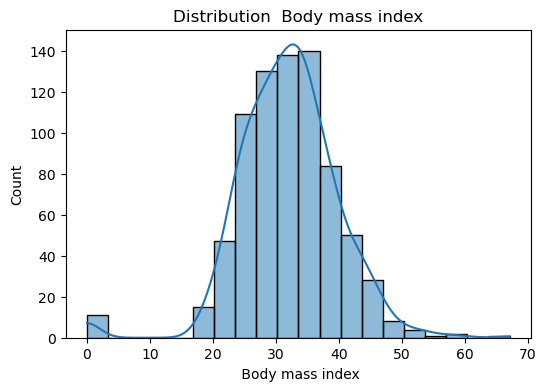

In [27]:
# Univariate Analysis: Glucose
plt.figure(figsize=(6, 4))
sns.histplot(df[' Body mass index'], bins=20, kde=True)
plt.title("Distribution  Body mass index")
plt.show()

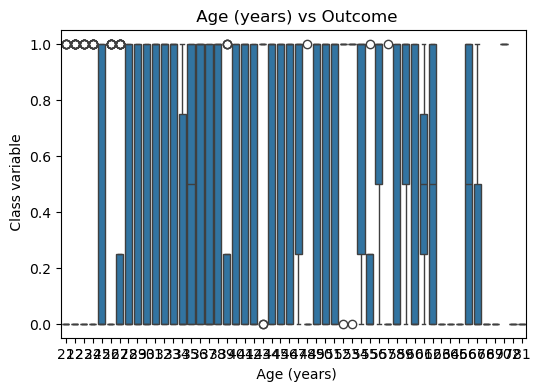

In [29]:
# Bivariate Analysis: Age vs Outcome
plt.figure(figsize=(6, 4))
sns.boxplot(x=' Age (years)', y=' Class variable',data=df)
plt.title(" Age (years) vs Outcome")
plt.show()


In [30]:
#now we want to spli tree, we need all feature columns
colnames=list(df.columns)

In [33]:
predictors=colnames[:8]
target=colnames[8]

In [35]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.3)

In [37]:
from sklearn.tree import DecisionTreeClassifier as DT

In [39]:
model=DT(criterion="entropy")

In [41]:
model.fit(train[predictors],train[target])

DecisionTreeClassifier(criterion='entropy')

In [43]:
preds=model.predict(test[predictors])
pd.crosstab(test[target],preds,rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1
Actual,,
0,116,42
1,26,47


In [45]:
np.mean(preds==test[target]) #Test data accuracy

0.7056277056277056

In [47]:
#prediction on train data
preds=model.predict(train[predictors])
pd.crosstab(train[target],preds,rownames=['Actual'],colnames=['Predicted'])

Predicted,0,1
Actual,,
0,342,0
1,0,195


In [49]:
np.mean(preds==train[target]) #train data accuracy

1.0

In [51]:
##Random Forest 


In [53]:
#Let us check assign input and output variables 
predictors=df.loc[:,df.columns!=" Class variable"]
target=df[" Class variable"]

In [55]:
#let us partition the dataset 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(predictors,target,test_size=0.3)

In [57]:
#MOdel Selection
from sklearn.ensemble import RandomForestClassifier
rand_for=RandomForestClassifier(n_estimators=500,n_jobs=1,random_state=42)

In [59]:
#Bootstrapping is getting samples
rand_for.fit(X_train,y_train)
pred_X_train=rand_for.predict(X_train)
pred_X_test=rand_for.predict(X_test)

In [60]:
#le us check the performance of the model 
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(pred_X_test,y_test)

0.7445887445887446

In [63]:
confusion_matrix(pred_X_test,y_test)

array([[133,  41],
       [ 18,  39]], dtype=int64)

In [65]:
#For training dataset
accuracy_score(pred_X_train,y_train)

1.0

In [67]:
confusion_matrix(pred_X_train,y_train)

array([[349,   0],
       [  0, 188]], dtype=int64)

In [69]:
input_data=(6,148,72,35,0,33.6,0.627,50)

#changing the input data to numpy array
input_as_np_arr=np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_df_reshaped=input_as_np_arr.reshape(1,-1)

prediction=rand_for.predict(input_df_reshaped)
print(prediction)

if(prediction[0]==0):
  print("Non Diabetic")
else:
  print("Diabetic")


[1]
Diabetic


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
